# Lavanya Pasupureddy 22MCA1026 (Kaiburr) Task 6. Data Science example. 

In [17]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [1]:
df = pd.read_csv('complaints.csv', low_memory=False)

In [2]:
# Columns are shown in rows for easy reading
df.head(2).T 

,0,1
Date received,2023-08-25,2023-08-25
Product,Credit reporting or other personal consumer re...,Credit reporting or other personal consumer re...
Sub-product,Credit reporting,Credit reporting
Issue,Improper use of your report,Incorrect information on your report
Sub-issue,Reporting company used your report improperly,Information belongs to someone else
Consumer complaint narrative,NaN,NaN
Company public response,NaN,NaN
Company,"SANTANDER HOLDINGS USA, INC.",WELLS FARGO & COMPANY
State,FL,CA
ZIP code,33972,92394


In [3]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(1464248, 2)

In [4]:
df1.head(15)

,Product,Consumer_complaint
233,"Credit reporting, credit repair services, or o...",I do not have any knowledge of applying for a ...
236,Checking or savings account,Checking account opened XX/XX/XXXX. I am a pre...
243,Credit card or prepaid card,I had workable credit card business relationsh...
246,Checking or savings account,At least one Bank of America savings account w...
248,Checking or savings account,Between the dates of XXXX and XXXX I was charg...
249,"Credit reporting, credit repair services, or o...",I noticed a drop in my credit score on Experia...
251,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting a...
258,"Credit reporting, credit repair services, or o...",I am writing to urgently request the removal o...
269,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX XXXX XXXX Pa XXXX XXXX XXX...
271,Student loan,"On XXXX XXXX, 2023 I received an email from Ne..."


In [5]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

36.2

In [6]:
pd.DataFrame(df.Product.unique()).values

array([['Credit reporting or other personal consumer reports'],
       ['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Credit card or prepaid card'],
       ['Debt collection'],
       ['Mortgage'],
       ['Checking or savings account'],
       ['Vehicle loan or lease'],
       ['Credit card'],
       ['Payday loan, title loan, or personal loan'],
       ['Student loan'],
       ['Money transfer, virtual currency, or money service'],
       ['Payday loan, title loan, personal loan, or advance loan'],
       ['Debt or credit management'],
       ['Prepaid card'],
       ['Credit reporting'],
       ['Consumer Loan'],
       ['Bank account or service'],
       ['Payday loan'],
       ['Money transfers'],
       ['Other financial service'],
       ['Virtual currency']], dtype=object)

In [7]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [8]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [9]:
pd.DataFrame(df2.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Consumer Loan
2,Mortgage
3,Credit card or prepaid card
4,Debt collection
5,"Payday loan, title loan, or personal loan"
6,Student loan
7,Bank account or service
8,Vehicle loan or lease
9,Checking or savings account


In [10]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()


,Product,Consumer_complaint,category_id
2054782,"Credit reporting, repair, or other",accordance with the Fair Credit Reporting act ...,0
1540532,Consumer Loan,I had an account since XXXX 2012 with capital ...,1
2721658,Mortgage,"My name is XXXX XXXX XXXX, I am an XXXX who r...",2
1596292,Credit card or prepaid card,Bank of America is denying credit based on fed...,3
580828,Debt collection,I not only dispute the debt validity because t...,4


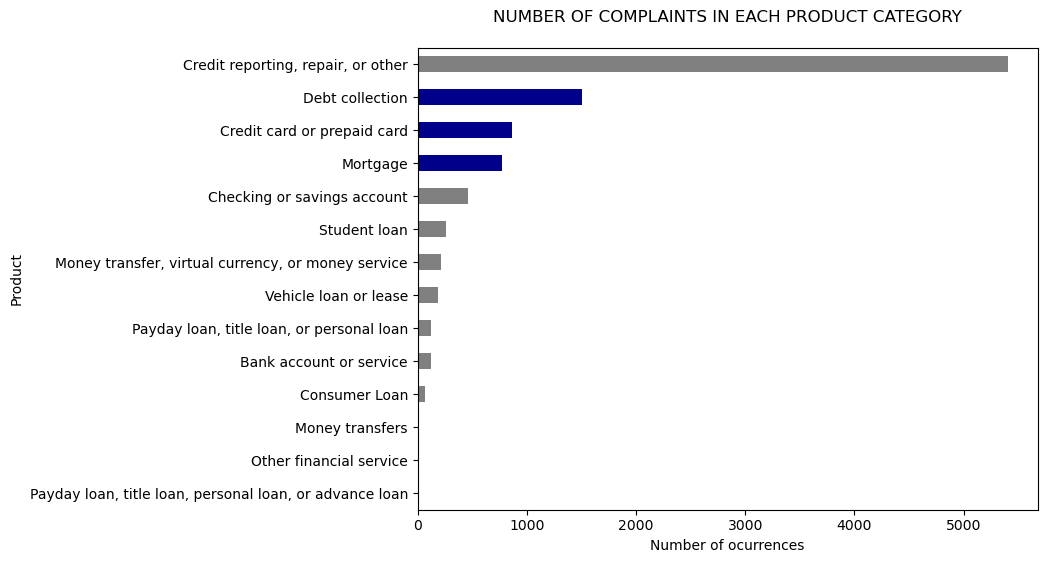

In [13]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 26190 features (TF-IDF score of unigrams and bigrams)


In [19]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]  # Use get_feature_names_out
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" % (Product))
    print("  * Most Correlated Unigrams are: %s" % (', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" % (', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: atm, overdraft, citigold
  * Most Correlated Bigrams are: savings checking, bonus xxxx, 00 atm

==> Checking or savings account:
  * Most Correlated Unigrams are: deposited, deposit, branch
  * Most Correlated Bigrams are: overdraft fees, wells fargo, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: honda, car, belongings
  * Most Correlated Bigrams are: end lease, repossession credit, honda financial

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: merchant, citi, card
  * Most Correlated Bigrams are: card company, american express, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: 1681, section, reporting
  * Most Correlated Bigrams are: credit report, 15 1681, 1681 section

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: collect debt, portfolio recovery, collection agency

==> M

In [20]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [21]:
# Models:

models = [LinearSVC(), MultinomialNB(),]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [22]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [23]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.8218,0.007371
MultinomialNB,0.6788,0.006742


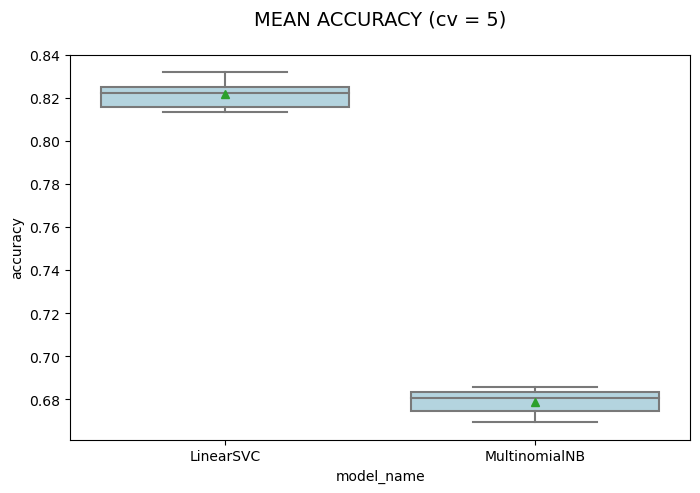

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [25]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
# Assuming y_test contains 12 unique classes
target_names = df2['Product'].unique()[:12]

# Then, use it in the classification report
print(metrics.classification_report(y_test, y_pred, target_names=target_names))


                                                    precision    recall  f1-score   support

                Credit reporting, repair, or other       0.88      0.93      0.90      1356
                                     Consumer Loan       0.00      0.00      0.00        21
                                          Mortgage       0.84      0.93      0.88       184
                       Credit card or prepaid card       0.67      0.77      0.71       186
                                   Debt collection       0.77      0.71      0.74       391
         Payday loan, title loan, or personal loan       1.00      0.12      0.21        34
                                      Student loan       0.84      0.72      0.78        68
                           Bank account or service       0.67      0.12      0.21        32
                             Vehicle loan or lease       0.49      0.42      0.45        40
                       Checking or savings account       0.62      0.70      0.

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


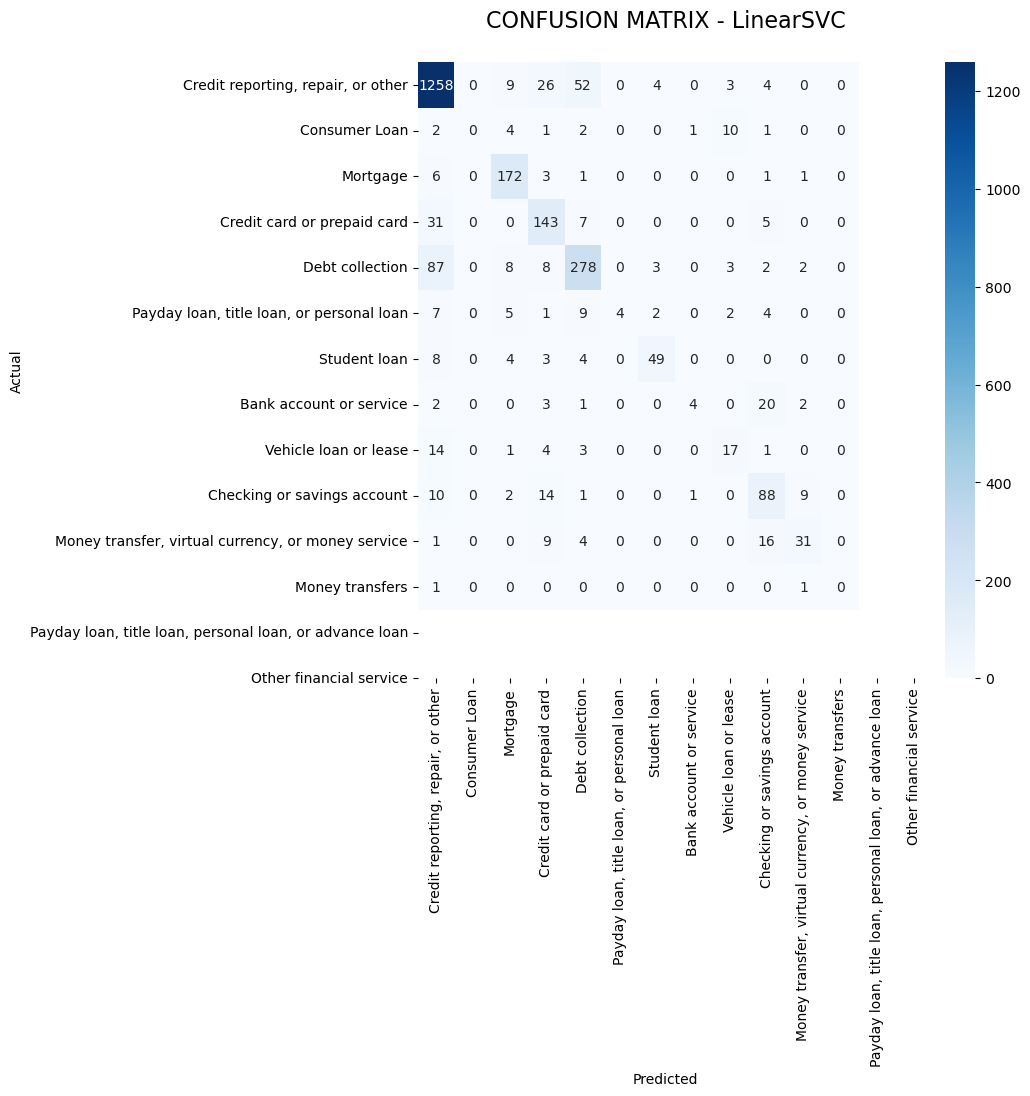

In [28]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [29]:
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 20:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
    
      display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 
                                                                'Consumer_complaint']])
      print('')

'Credit card or prepaid card' predicted as 'Credit reporting, repair, or other' : 31 examples.


,Product,Consumer_complaint
2209192,Credit card or prepaid card,I have never missed a payment and I am very di...
721487,Credit card or prepaid card,I saw an XXXX ad for CareCredit suggesting tha...
2121887,Credit card or prepaid card,I have tried since XX/XX/XXXX and XX/XX/XXXX a...
2934,Credit card or prepaid card,I am writing to request an increase on my Barc...
3048264,Credit card or prepaid card,I requested to have my account ( XXXX XXXX ) c...
737458,Credit card or prepaid card,I have contacted XXXX 's XXXX several times re...
1034340,Credit card or prepaid card,Opened credit card account in XXXX of XXXX. My...
735058,Credit card or prepaid card,"Hello, Im trying to link XXXX to my XXXX XXXX ..."
777722,Credit card or prepaid card,I have had a Best Buy Citibank account for nea...
2941328,Credit card or prepaid card,I called to request TD Bank who operates the T...



'Debt collection' predicted as 'Credit reporting, repair, or other' : 87 examples.


,Product,Consumer_complaint
1734740,Debt collection,I was contacted by Kingston Data and Credit. W...
1408871,Debt collection,In accordance with the Fair Credit Reporting a...
2659512,Debt collection,This complaint is regarding account informatio...
91560,Debt collection,On XX/XX/2020 I sent a certified letter to Mon...
984516,Debt collection,I am writing to report multiple violations to ...
...,...,...
2302300,Debt collection,On XX/XX/22 I noticed that a collection accoun...
1262366,Debt collection,I am a victim of identity theft. I recently le...
3460804,Debt collection,I HAVE DISPUTE THSI ACCOUNT XXXX XXXX XXXX XX...
516788,Debt collection,I am beyond exhausted with all my efforts to r...


IndexError: index 12 is out of bounds for axis 0 with size 12

In [31]:
N = 4
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]  # Use get_feature_names_out
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("\n==> '{}':".format(Product))
    print("  * Top unigrams: %s" %(', '.join(unigrams)))
    print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'Bank account or service':
  * Top unigrams: atm, citigold, bank, overdraft
  * Top bigrams: good reason, america account, savings checking, bonus xxxx

==> 'Checking or savings account':
  * Top unigrams: chime, bank, branch, account
  * Top bigrams: account bank, savings account, 00 bonus, debit card

==> 'Consumer Loan':
  * Top unigrams: loan, ally, car, instrument
  * Top bigrams: hard pull, xxxx national, ve trying, repossession credit

==> 'Credit card or prepaid card':
  * Top unigrams: card, capital, citi, synchrony
  * Top bigrams: balance transfer, paypal credit, best buy, american express

==> 'Credit reporting, repair, or other':
  * Top unigrams: equifax, experian, transunion, reporting
  * Top bigrams: xxxx xxxx, told company, payments account, hard inquiry

==> 'Debt collection':
  * Top unigrams: debt, collection, calls, apartment
  * Top bigrams: loan took, portfolio recovery, xxxx say, investigation remove

==> 'Money transfer, virtual currency, or money service

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [33]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Student loan']


In [34]:
df2[df2['Consumer_complaint'] == new_complaint]

,Product,Consumer_complaint,category_id


In [36]:
new_complaint_2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

['Credit reporting, repair, or other']


In [37]:
df2[df2['Consumer_complaint'] == new_complaint_2]

,Product,Consumer_complaint,category_id
